#**MID Tes Pemrosesan Citra Digital**
#Pemrosesan Citra Digital A


**Rahmaliyah Kadir - H071201093**

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
import numpy as np
from numpy import*
import matplotlib.image as mping
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

Petunjuk: 

a. Tuliskan sintaks yang digunakan pada lembar jawaban dan kumpulkan sebagai file pdf.

b. Kumpulkan juga file ipynb dari program yang telah dibuat.

#1. Ubah ukuran citra banana.jpg menjadi setengah dari ukuran semula (300x450).

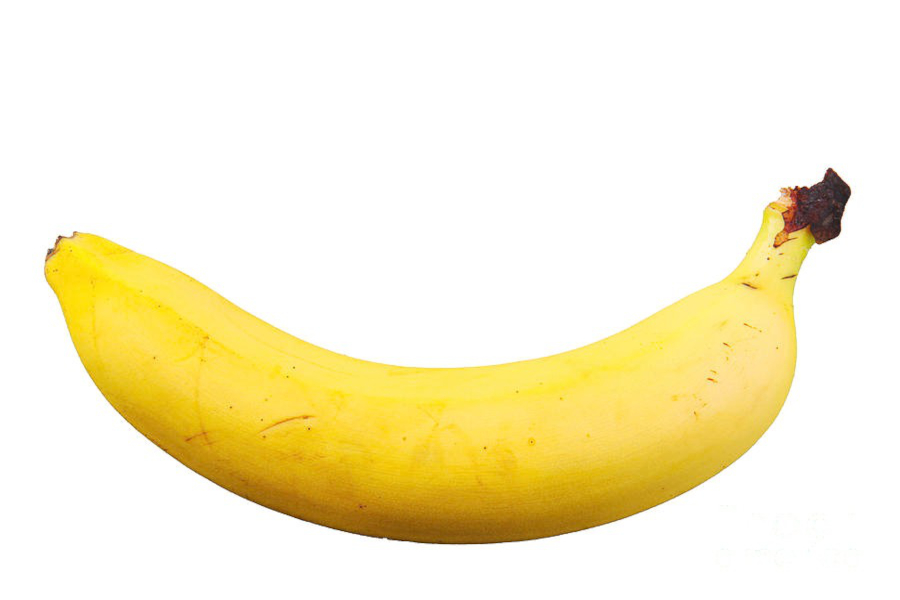

In [177]:
banana = cv2.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/banana.jpg')
cv2_imshow(banana) 

In [178]:
zoom_in = cv2.resize(banana, (0,0), fx=0.5, fy=0.5)

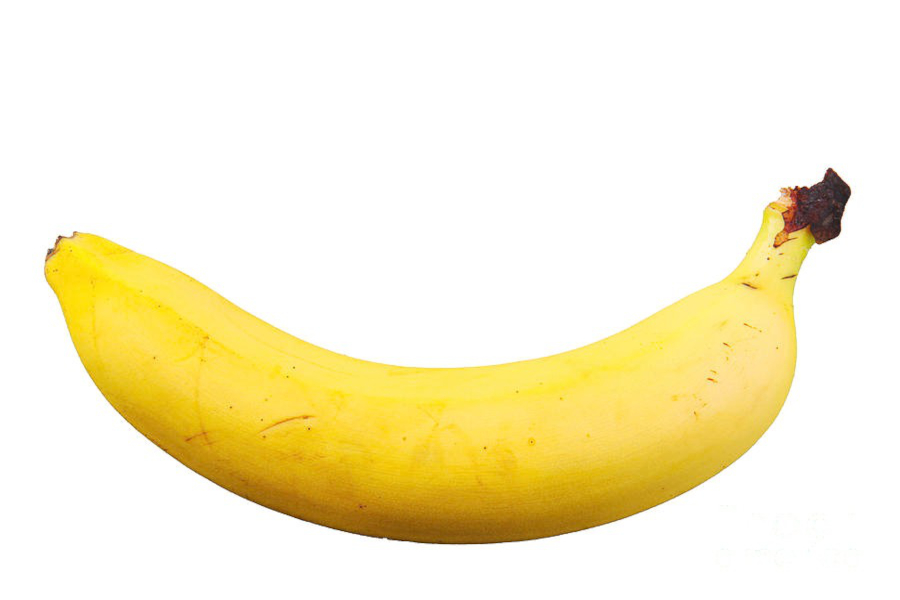

In [179]:
cv2_imshow(banana)

#2. Tampilkan histogram citra bird.jpg untuk masing-masing komponen warna dalam satu grafik.

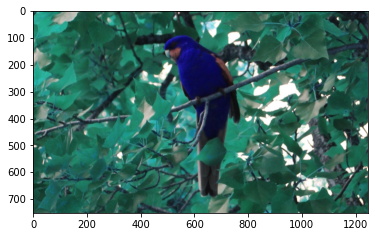

In [181]:
burung = cv2.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/bird.jpg')
plt.imshow(burung)

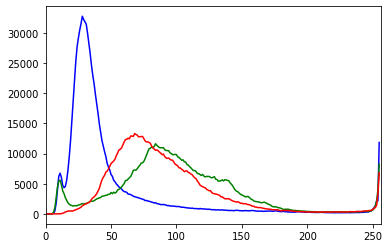

In [182]:
img = ('b', 'g', 'r')
for i,col in enumerate(img):
 histogram = cv2.calcHist([burung],[i],None,[256],[0,256])
 plt.plot(histogram,color = col)
 plt.xlim([0,256])
plt.show( )

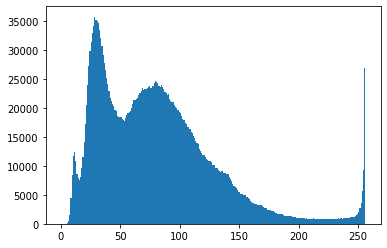

In [183]:
plt.hist(burung.ravel(),256,[0,256]);
plt.show( )

#3. Gunakan perataan histogram untuk masing-masing komponen warna untuk memperbaiki kualitas citra kabut.png. Tampilkan histogramnya sebelum dan sesudah perataan untuk masing-masing komponen warna.

In [184]:
def perataanHistogram(A):
  nilai_bin = 255
  A = A+1
  [frekuensi,value] = np.histogram(A,bins=nilai_bin)
  cumulatif_histogram = frekuensi.cumsum()
  [baris,kolom] = A.shape
  probabilty_frekuensi = np.round((cumulatif_histogram/float(A.size))*nilai_bin)
  B = np.empty(A.shape)
  for i in range(0,baris):
    for j in range(0,kolom):
      B[i,j] = probabilty_frekuensi[A[i,j]-1]
  return B

In [185]:
I = cv2.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/kabut.png')

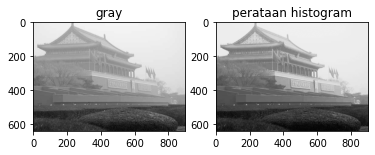

In [186]:
ramma = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
hasil = perataanHistogram(ramma)
color = ('b','g','r')
plt.subplot(1,2,1),plt.imshow(ramma,cmap='gray'),plt.title('gray')
plt.subplot(1,2,2),plt.imshow(hasil,cmap='gray'),plt.title('perataan histogram')
plt.show()

(array([0.0000e+00, 3.0000e+00, 1.0000e+01, 9.5000e+01, 3.1100e+02,
        1.4500e+03, 2.9370e+03, 2.3340e+03, 3.3020e+03, 1.0220e+03,
        1.9500e+03, 2.0160e+03, 1.1000e+03, 1.1900e+03, 1.3220e+03,
        1.4480e+03, 3.1070e+03, 1.7760e+03, 1.8070e+03, 1.9240e+03,
        2.0280e+03, 4.3670e+03, 2.2160e+03, 2.2940e+03, 2.3970e+03,
        0.0000e+00, 2.4650e+03, 5.2230e+03, 2.6090e+03, 2.7150e+03,
        0.0000e+00, 2.7980e+03, 2.7910e+03, 2.7000e+03, 5.3690e+03,
        2.6380e+03, 2.5820e+03, 2.4840e+03, 2.3670e+03, 4.7230e+03,
        2.1530e+03, 2.0960e+03, 3.9470e+03, 3.9040e+03, 1.9450e+03,
        1.9150e+03, 1.8890e+03, 5.7140e+03, 2.0110e+03, 1.9310e+03,
        1.9930e+03, 1.9170e+03, 2.1640e+03, 4.3960e+03, 2.0390e+03,
        2.0490e+03, 2.1200e+03, 5.9140e+03, 2.3230e+03, 2.7490e+03,
        2.1220e+03, 3.2240e+03, 5.9470e+03, 0.0000e+00, 1.8120e+03,
        0.0000e+00, 2.8730e+03, 1.4750e+03, 4.7120e+03, 3.7000e+03,
        1.4220e+03, 1.5020e+03, 3.2340e+03, 2.25

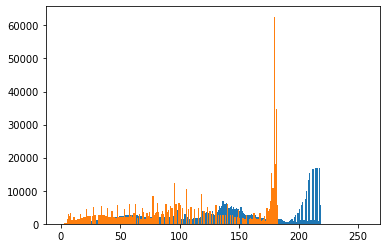

In [187]:
plt.hist(ramma.ravel(),256,[0,256])
plt.hist(hasil.ravel(),256,[0,256])

#4. Proses gambar banana.jpg menggunakan highpass filter untuk menghasilkan output seperti pada
gambar berikut:

In [188]:
a = cv2.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/banana.jpg')

In [189]:
a = cv2.resize(a, (680, 520),
				interpolation=cv2.INTER_CUBIC)
a = a[:,:,0]

alpha = 1.5
beta = 90

hpf = a - cv2.GaussianBlur(a, (21, 21), 3)+127
result = cv2.convertScaleAbs(hpf, alpha=alpha, beta=beta)

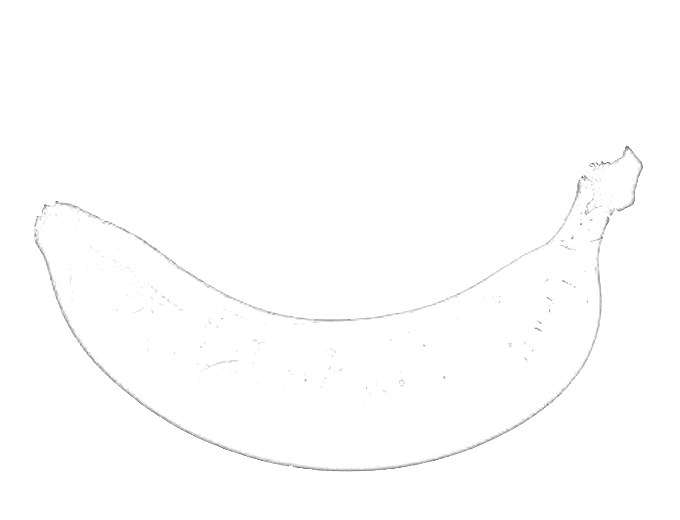

In [190]:
cv2_imshow(result)

#5. Hilangkan noise pada citra phone_noise.jpg menggunakan average dan median filter.

In [191]:
but = cv2.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/kabut.png')

Median

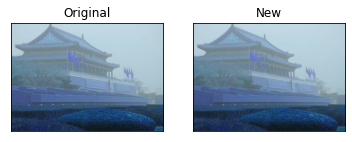

In [192]:
amma = cv2.medianBlur(but,5)
 
plt.subplot(121),plt.imshow(but),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(amma),plt.title('New')
plt.xticks([]), plt.yticks([])
plt.show()

Avarage

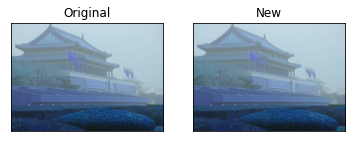

In [193]:
amma = cv2.blur(but,(5,5))
 
plt.subplot(121),plt.imshow(but),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(amma),plt.title('New')
plt.xticks([]), plt.yticks([])
plt.show()

#6. Gunakan citra burung.jpg sebagai latar belakang citra banana.jpg seperti pada gambar berikut:

In [197]:
banana_img = mpimg.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/banana.jpg')
burung_img = mpimg.imread('/content/drive/MyDrive/TGS_PCD_01/UTS/burung.jpg')

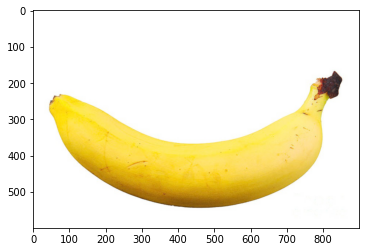

In [198]:
plt.imshow(banana_img)

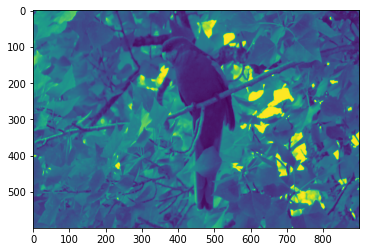

In [200]:
plt.imshow(burung_img)

In [201]:
print(banana_img.shape)
print(burung_img.shape)

(600, 900, 3)
(600, 900)


In [202]:
aC = np.zeros((600, 900, 3))
n = 0.7

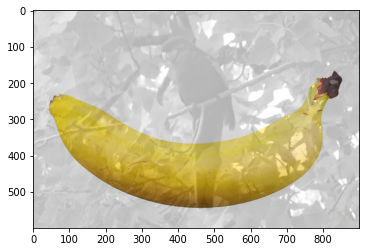

In [203]:
for x in range(0, len(banana_img)):
  for y in range(0, len(banana_img[0])):
    aC[x][y] = (n * banana_img[x][y]) + ((1-n) * burung_img[x][y])

plt.imshow(aC.astype('uint8'))